<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LightGBM/44_LightGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LightGBM ile XGBoost arasındaki fark XGBoost ağaçlarda seviye bazlı büyüme öngörülürken lightgbm de yaprak bazlı gider.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#eda

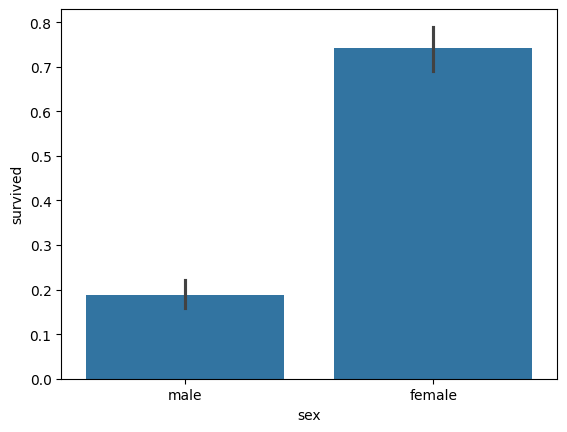

In [7]:
sns.barplot(data=df,x="sex",y="survived")
plt.show()

In [8]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


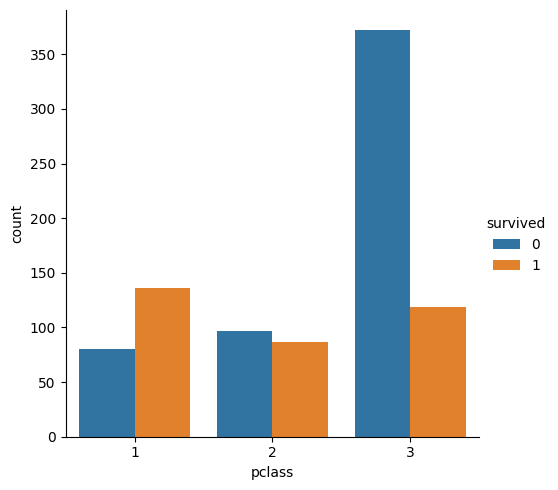

In [10]:
sns.catplot(data=df,x="pclass",hue="survived",kind="count")
plt.show()

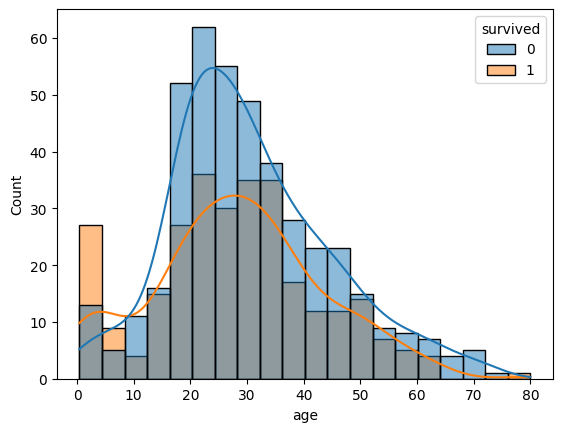

In [12]:
sns.histplot(data=df,x="age",hue="survived",kde=True)
plt.show()

In [13]:
df['who'].value_counts()

,count
who,
man,537
woman,271
child,83


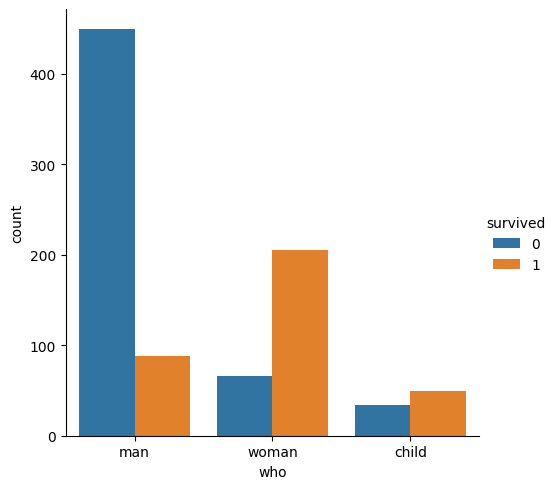

In [15]:
sns.catplot(data=df,x="who",hue="survived",kind="count") # sns.countplot(data=df,x="who",hue="survived")
plt.show()

In [16]:
# feature engineering

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [19]:
df.shape

(891, 15)

In [20]:
df = df.drop(["deck","embark_town","alive"],axis=1)

In [21]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [22]:
# embarked kolonuna en çok hangisi tekrar ediyorsa yani modu 2 tane null olan rowlara vericem.

In [23]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df['embarked'].mode()[0]

'S'

In [27]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [29]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [30]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [31]:
# LightGBM bazlı sadece çalışacaksak null değerleri ve kategorik değerleri encode işlemlerini direk lightgbm içinde verebiliriz.Mesela lightgbm instance oluştururken içine categorical_feature = [] listeyi verebiliriz.

In [32]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [33]:
df['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [34]:
df['embarked'].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [35]:
df['who'].value_counts()

,count
who,
man,537
woman,271
child,83


In [36]:
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

In [37]:
df['alone']

,alone
0,0
1,0
2,1
3,0
4,1
...,...
886,1
887,1
888,0
889,1


In [38]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
categorical_cols = ["sex","class","embarked","who"]

In [46]:
preprocessor = ColumnTransformer(transformers=
                                 [

                                  ("cat",OneHotEncoder(drop="first",handle_unknown="ignore"),categorical_cols)

                                 ],remainder="passthrough"
                                 )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [47]:
encoded_cols = preprocessor.get_feature_names_out()

In [48]:
X_train = pd.DataFrame(X_train,columns=encoded_cols)
X_test = pd.DataFrame(X_test,columns=encoded_cols)

In [53]:
X_train.head()

,cat__sex_male,cat__class_Second,cat__class_Third,cat__embarked_Q,cat__embarked_S,cat__who_man,cat__who_woman,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__adult_male,remainder__alone
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,27.0,0.0,0.0,7.8958,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,17.0,0.0,0.0,10.5000,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,26.0,0.0,0.0,8.0500,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,43.0,0.0,0.0,8.0500,1.0,1.0


In [54]:
!pip install lightgbm

In [55]:
import lightgbm as lgb

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
gbm  = lgb.LGBMClassifier(verbosity=-1)
gbm.fit(X_train,y_train)

LGBMClassifier(verbosity=-1)

In [58]:
y_pred = gbm.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.76      0.75      0.75        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  23]
 [ 24  72]]


In [66]:
importances=gbm.feature_importances_

feature_names = X_train.columns
feature_importance = pd.DataFrame(

                  {
                      "Feature" : feature_names,
                      "Importance" : importances
                  }

).sort_values(by="Importance",ascending=False)

In [67]:
feature_importance # modele etkilerini görebiliriz.

,Feature,Importance
11,remainder__fare,1132
8,remainder__age,865
4,cat__embarked_S,81
10,remainder__parch,77
9,remainder__sibsp,65
0,cat__sex_male,60
2,cat__class_Third,51
13,remainder__alone,41
1,cat__class_Second,41
6,cat__who_woman,36


In [68]:
#hyperparameter-tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
lgb_model = lgb.LGBMClassifier(verbosity=-1)

In [71]:
param_grid = {

              "n_estimators" : [100,300,500,1000],
              "max_depth" : [3,5,7,-1],
              "learning_rate" : [0.01,0.05,0.1,0.3],
              "num_leaves" : [15,31,63,127],
              "min_child_samples" : [10,20,30],
              "subsample" : [0.6,0.8,1.0],
              "colsample_bytree" : [0.6,0.8,1.0]
}

In [72]:
random_search = RandomizedSearchCV(estimator=lgb_model,param_distributions=param_grid,cv=5,scoring="accuracy",verbose=1,n_jobs=-1)

In [73]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [75]:
random_search.best_params_

{'subsample': 0.8,
 'num_leaves': 15,
 'n_estimators': 300,
 'min_child_samples': 10,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6}

In [76]:
y_pred = random_search.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       127
           1       0.83      0.76      0.79        96

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

[[112  15]
 [ 23  73]]


In [78]:
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [80]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.79      0.72      0.75        96

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[109  18]
 [ 27  69]]


In [81]:
params= {

              "n_estimators" : [100,300,500,1000],
              "max_depth" : [3,5,7,-1],
              "learning_rate" : [0.01,0.05,0.1,0.3],
              "colsample_bytree" : [0.6,0.8,1.0]
}

In [82]:
random_search_xgboost = RandomizedSearchCV(estimator = XGBClassifier(),param_distributions=params,cv=5,scoring="accuracy",n_jobs=-1)

In [83]:
random_search_xgboost.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1808, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/di

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'n_estimators': [100, 300, 500, 1000]},
                   scoring='accuracy')

In [85]:
y_pred = random_search_xgboost.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       127
           1       0.84      0.80      0.82        96

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

[[112  15]
 [ 19  77]]


In [87]:
# LightGBM acuraccy değerinin biraz daha az olduğunu gördük xgboosta göre fakat bankalarda büyük verilerle çalıştığımızda hız maliyet açısından çok önemli olduğu için birkaç puan accuracy değerinin az
# olması gözümüze batmaz.

In [88]:
# drop multicollineraity columns

In [90]:
df = df.drop("who",axis=1)

In [91]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,1,1


In [100]:
# df = pd.get_dummies(df,columns=["sex","embarked","class"],drop_first=True)

In [101]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,1,0,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,0,0,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,1,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,0,0,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True


In [102]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [103]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [104]:
X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
321,3,27.0,0,0,7.8958,1,1,True,False,True,False,True
84,2,17.0,0,0,10.5000,0,1,False,False,True,True,False
633,1,28.0,0,0,0.0000,1,1,True,False,True,False,False
401,3,26.0,0,0,8.0500,1,1,True,False,True,False,True
668,3,43.0,0,0,8.0500,1,1,True,False,True,False,True


In [105]:
gbm2 = lgb.LGBMClassifier(verbosity=-1)
gbm2.fit(X_train,y_train)
y_pred = gbm2.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       127
           1       0.79      0.73      0.76        96

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[108  19]
 [ 26  70]]


In [106]:
lgb_model2 = lgb.LGBMClassifier(verbosity=-1)

In [107]:
param_grid = {

              "n_estimators" : [100,300,500,1000],
              "max_depth" : [3,5,7,-1],
              "learning_rate" : [0.01,0.05,0.1,0.3],
              "num_leaves" : [15,31,63,127],
              "min_child_samples" : [10,20,30],
              "subsample" : [0.6,0.8,1.0],
              "colsample_bytree" : [0.6,0.8,1.0]
}

In [108]:
random_search = RandomizedSearchCV(estimator=lgb_model,param_distributions=param_grid,cv=5,scoring="accuracy",verbose=1,n_jobs=-1)

In [109]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [110]:
random_search.best_params_

{'subsample': 1.0,
 'num_leaves': 31,
 'n_estimators': 100,
 'min_child_samples': 20,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [111]:
y_pred = random_search.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       127
           1       0.79      0.74      0.76        96

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.80      0.80      0.80       223

[[108  19]
 [ 25  71]]


In [113]:
gmb2_rcv = lgb.LGBMClassifier(n_estimators=100,max_depth=-1,num_leaves=31,min_child_samples=20,learning_rate=0.1,colsample_bytree=0.6,subsample=1.0)

In [114]:
gmb2_rcv.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.6)

In [115]:
y_pred = gmb2_rcv.predict(X_test)

In [116]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       127
           1       0.79      0.74      0.76        96

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.80      0.80      0.80       223

[[108  19]
 [ 25  71]]
